Chao formula Eq.6.207  https://www.slac.stanford.edu/~achao/WileyBook/WileyChapter6.pdf
CGS units are used. 

In [1]:
import numpy as np
from scipy.constants import m_p, c, e
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
## Choose plane of interest
plane = 'y' # 'x' or 'y'

if plane == 'x':
    #column_select = 1
    legend_Im = r'$\mathrm{Im(Z_x)}$'
    legend_Re = r'$\mathrm{Re(Z_x)}$'
    y_label = r'$\mathrm{Z_x \ [\Omega /m]}$'
    Q_b = 20.13 # betatron tune
if plane == 'y':
    #column_select = 2
    legend_Im = r'$\mathrm{Im(Z_y)}$'
    legend_Re = r'$\mathrm{Re(Z_y)}$'
    y_label = r'$\mathrm{Z_y \ [\Omega /m]}$'
    Q_b = 20.18 # betatron tune

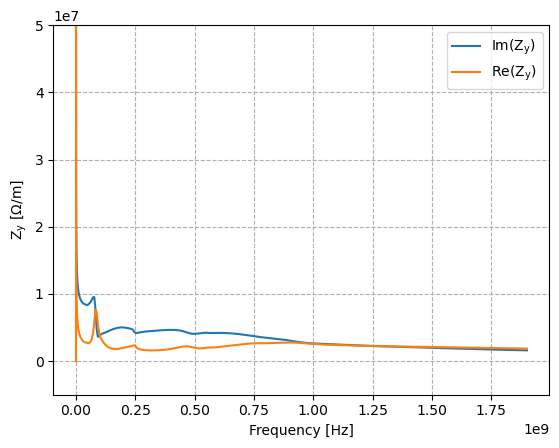

In [ ]:
#### Impedance model from https://gitlab.cern.ch/IRIS/SPS_IW_model/SPS_IW_merged_single_multibunch 
impedanceData = np.genfromtxt('SPS_Imp_model_with_kicker_wall_PostLS2_Q20.txt', skip_header=1, dtype=complex)

freqZ = np.real(impedanceData[:, 0]) * 1E9  # frequencies in [GHz] in the file, so I convert it to [Hz]
omegaZ = 2*np.pi*freqZ # Angular frequency, omega_0 

# Here I have selected the columns for the vertical plane, change this to compute the tune shift for the horizontal plane.
ReZ_y_dipolar = np.real(impedanceData[:, 2]) # dipolar kick in y-plane, always odd, -f(x) = f(-x)
ImZ_y_dipolar = np.imag(impedanceData[:, 2]) # dipolar kick in the y-plane, always even f(-x) = f(x)

ReZ_y_quad = np.real(impedanceData[:, 4]) 
ImZ_y_quad = np.imag(impedanceData[:, 4])  


#'''
plt.plot(freqZ, ImZ_y_dipolar, label=legend_Im)
plt.plot(freqZ, ReZ_y_dipolar, label=legend_Re)
plt.xlabel('Frequency [Hz]')
plt.ylabel(y_label)
plt.legend()
plt.grid(ls='--')
plt.ylim(-0.5e7, 0.5e8)
plt.show()
#'''

### Compute the effective impedance

The effective impedance $Z_{eff}$ is described by:

$Z_{\perp eff}^{(l)} = \frac{\sum_{p=-\infty}^{+ \infty}Z_{\perp }^{(l)}(\omega_{p}) h_l(\omega_{p}-\omega_\xi)}{\sum_{p=-\infty}^{+ \infty}h_l(\omega_{p}-\omega_\xi)}$ (1)

with $\omega_p = (p+Q)\omega_0$ the discrete spectrum of the transverse bunch oscillations. $-\infty < p < + \infty$ for a single bunch (which is our case) or several bunches oscillating independently. $\omega_\xi=(\xi \omega_{\beta})/(\eta)=(\xi \nu_b \omega_{0})/(\eta)$ the chromatic frequency, with $\eta$ the phase slip factor. Note that $Q'$ is the chromaticity defined as $Q' = d\nu_b/d\delta$ with $\delta=\Delta P/P_0$ the relative momentum error, and $Q^\prime=\xi * \nu_b$. Thus we can re-write $\omega_\xi=Q^\prime \omega_0 / \eta$.

Last, $h_l$, is the power spectral density of a Gaussian bunch of $l$ azimuthial mode. $h_l$ is described by (Chapter Eq.6.143):
$h_l(\omega) = (\omega \sigma_z/c)^{2l} e^{-(\omega \sigma_z/c)^2}$ (2)   

In [4]:
# For a Gaussian beam
def hmm_gaus(omega, sigma_z, clight, l=0):
    return (omega*sigma_z/clight)**(2*l)*np.exp(-(omega*sigma_z/clight)**2)

In [ ]:
# create the spectrum with discrete lines
fmax = 1.9e9 # Hz
num_p = int(fmax/f_0)
sidebands_p = np.arange(-num_p, num_p + 0.5)

#nSideband = 35000
#sidebands_p = np.arange(-nSideband, nSideband+0.5)

In [6]:
l = 0 # azimuthial mode (headtail mode)
clight = c*1e2 #[cm]/[s]
circum = 2 * np.pi * 1.1*1e3*1e2  # [cm]
f_0 = clight / circum  # revolution frequency in Hz
omega_0 = 2 * np.pi * f_0  # angular revolution frequency


In [7]:
f_0

43375.865083972196

In [ ]:
omegas = sidebands_p*omega_0 + Q_b*omega_0 # the middle is not zero due to the shift of the betatron tune
omegas

array([-9.53335111e+09, -9.53307857e+09, -9.53280603e+09, ...,
        9.54380569e+09,  9.54407823e+09,  9.54435077e+09])

In [ ]:
Qp = 0.0 # chromaticity. So it is xi*tune
gamma_t = 18 # gamma transition

# Compute lorentz factor
m0 = 0.9382720813e9 # proton rest mass, [eV/c^2]
E_rest = m0
E_0 = 26e9  # total energy of the reference particle [eV]
gamma = E_0/E_rest
eta = 1 / gamma_t ** 2 - 1 / gamma ** 2 # slip factor
omega_xi = Qp * omega_0 / eta

sigma_z = 23 #15.5 # [cm] 

len(h_s) = 70001


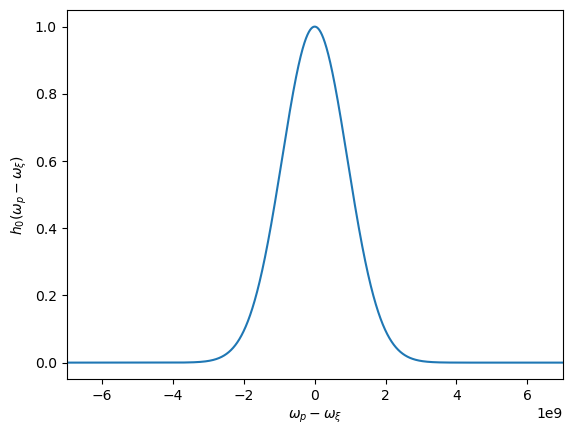

In [10]:
hs = hmm_gaus(omegas-omega_xi, sigma_z, clight=clight, l=l)
plt.plot(omegas-omega_xi, hs)
plt.xlabel(r'$\omega_p - \omega_\xi$')
plt.ylabel(r'$h_0(\omega_p - \omega_\xi)$')
plt.xlim(-0.07e11, 0.07e11)

print(f'len(h_s) = {len(hs)}')

In [11]:
### Create impedance for negative frequencies and Extrapolate Zeff in the omegas

(-5000000.0, 50000000.0)

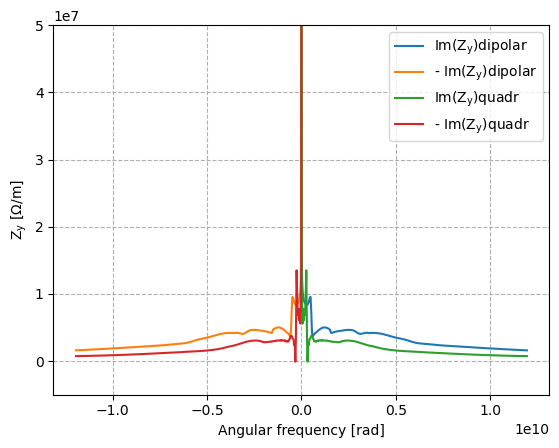

In [12]:
# ImZ is always even f(x) = f(-x)
ImZ_y_pos_dipolar = ImZ_y_dipolar
ImZ_y_neg_dipolar = ImZ_y_dipolar

ImZ_y_pos_quad = ImZ_y_quad
ImZ_y_neg_quad = ImZ_y_quad

# Plot vertical impedance also for negative frequencies
plt.plot(omegaZ, ImZ_y_pos_dipolar, label=legend_Im + 'dipolar')
plt.plot(-omegaZ, ImZ_y_neg_dipolar, label='- '+legend_Im + 'dipolar')
plt.plot(omegaZ, ImZ_y_pos_quad, label=legend_Im + 'quadr')
plt.plot(-omegaZ, ImZ_y_neg_quad, label='- '+legend_Im + 'quadr')

plt.xlabel('Angular frequency [rad]')
plt.ylabel(y_label)
plt.legend()
plt.grid(ls='--')
plt.ylim(-0.5e7, 0.5e8)

In [13]:
### Extrapolate

(-5000000.0, 50000000.0)

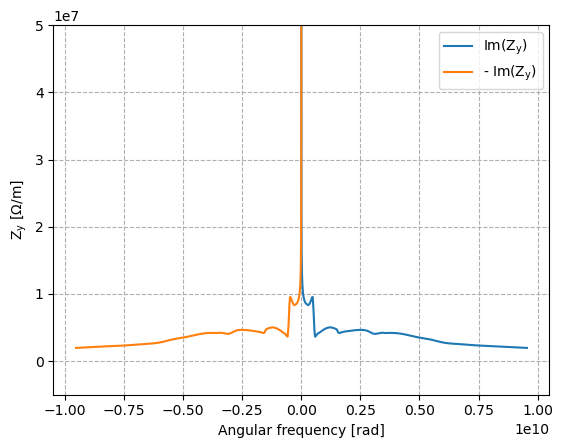

In [14]:
omegas_pos = list(filter(lambda x: x >= 0, omegas)) # Positive
omegas_neg = list(filter(lambda x: x < 0, omegas)) # Negative

ImZ_pos_interp_y_dipolar = np.interp(omegas_pos, omegaZ, ImZ_y_pos_dipolar)
ImZ_neg_interp_y_dipolar = np.interp(np.abs(omegas_neg), omegaZ, ImZ_y_neg_dipolar)

ImZ_pos_interp_y_quad = np.interp(omegas_pos, omegaZ, ImZ_y_pos_quad)
ImZ_neg_interp_y_quad = np.interp(np.abs(omegas_neg), omegaZ, ImZ_y_neg_quad)

# Plot ImZ(my_omegas)
plt.plot(omegas_pos, ImZ_pos_interp_y_dipolar, label=legend_Im)
plt.plot(omegas_neg, ImZ_neg_interp_y_dipolar, label='- '+legend_Im )

plt.xlabel('Angular frequency [rad]')
plt.ylabel(y_label)
plt.legend()
plt.grid(ls='--')
plt.ylim(-0.5e7, 0.5e8)
#plt.xlim(-1.5e10, 1.5e10)


length ImZ_interp_total_y_dipolar = 70001
length ImZ_interp_total_y_quad = 70001
len(h_l) = 70001


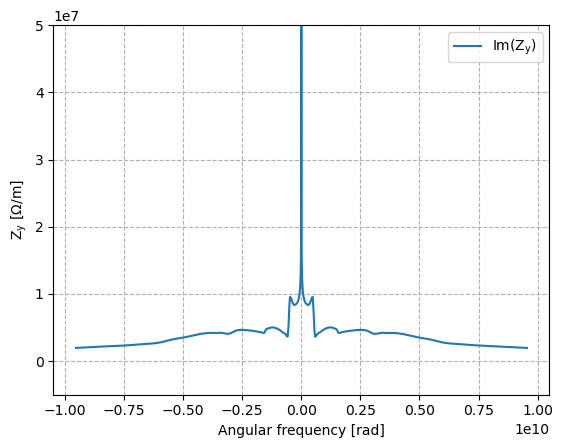

In [15]:
# Construct and plot total impedance.

ImZ_interp_total_y_dipolar = list(ImZ_neg_interp_y_dipolar)+list(ImZ_pos_interp_y_dipolar)
ImZ_interp_total_y_quad = list(ImZ_neg_interp_y_quad)+list(ImZ_pos_interp_y_quad)


plt.plot(omegas, ImZ_interp_total_y_dipolar, label=legend_Im)
plt.xlabel('Angular frequency [rad]')
plt.ylabel(y_label)
plt.legend()
plt.grid(ls='--')
plt.ylim(-0.5e7, 0.5e8)
#plt.xlim(-10e10, 10e10)

print(f'length ImZ_interp_total_y_dipolar = {len(ImZ_interp_total_y_dipolar)}')
print(f'length ImZ_interp_total_y_quad = {len(ImZ_interp_total_y_dipolar)}')
print(f'len(h_l) = {len(hs)}')

In [16]:
# compute effective impedance

# DIPOLAR
Zeff_nominator_dipolar = np.sum(ImZ_interp_total_y_dipolar*hs)
Zeff_denominator_dipolar = np.sum(hs)
Zeff_dipolar = Zeff_nominator_dipolar/Zeff_denominator_dipolar

# QUADRUPOLAR
Zeff_nominator_quad = np.sum(ImZ_interp_total_y_quad*hs)
Zeff_denominator_quad = np.sum(hs)
Zeff_quad = Zeff_nominator_quad/Zeff_denominator_quad

Zeff = Zeff_dipolar+Zeff_quad

print(f'Zeff = {Zeff} [Ohm/m]')

Zeff = 11342962.822985414 [Ohm/m]


### Convert in CGS units
- 1 [Ohm] = (1/9)*10**(-11) [s]/[cm]
- 1 [Ohm]/[m] = (1/9)*10**(-13) [s]/[cm]**2 

In [17]:
iZeff_cgs = Zeff*(1/9)*1e-13 #[s]/[cm]**2 iZeff of Eq.6.207

### Compute DQ (CGS units)

\begin{equation}
\Omega^{(l)}-\omega_{\beta}-l\omega_s = -\frac{1}{4\pi}\frac{\Gamma(l+1/2)}{2^l l!}\frac{N r_0 c^2}{\gamma T_0 \omega_\beta \sigma} jZ_{eff} \ \ (4)
\end{equation}

For l = 0 :

- $\Gamma(1/2)=\sqrt{\pi}$
- $T_0 = 2\pi/\omega_0$
- $Q_y = \omega_\beta/\omega_0$

\begin{equation}
\Omega^{(l)}-\omega_{\beta} = -\frac{\sqrt{\pi}}{4\pi}\frac{N r_0 c^2}{\gamma \frac{2\pi}{\omega_0} \omega_\beta \sigma} jZ_{eff}  \ \ (5)
\end{equation}

which is written:
\begin{equation}
\Delta\Omega = -\frac{N r_0 c^2}{8\pi^{3/2}\gamma Q_b \sigma} jZ_{eff}   \ \ (6)
\end{equation}

Last, 

\begin{equation}
\Delta Q = \frac{\Delta \Omega^{(l)}}{\omega_0} \ \ (7)
\end{equation}


DQ_coh = -0.0 
DQ_coh = -0.0017581870336012453 
DQ_coh = -0.0035163740672024906 
DQ_coh = -0.005274561100803736 
DQ_coh = -0.007032748134404981 
DQ_coh = -0.008790935168006225 
DQ_coh = -0.010549122201607471 
DQ_coh = -0.012307309235208716 
DQ_coh = -0.014065496268809962 
DQ_coh = -0.015823683302411205 
DQ_coh = -0.01758187033601245 
DQ_coh = -0.0193400573696137 
DQ_coh = -0.021098244403214943 
DQ_coh = -0.02285643143681619 
DQ_coh = -0.024614618470417432 
DQ_coh = -0.02637280550401868 
DQ_coh = -0.028130992537619925 
DQ_coh = -0.029889179571221166 
DQ_coh = -0.03164736660482241 
DQ_coh = -0.03340555363842366 


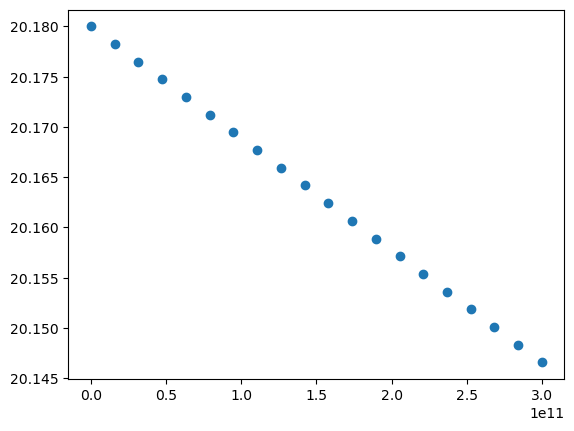

In [19]:
# Compute DQ
r_0 = 1.535 * 10 ** (-16)

#intensity_list = np.linspace(0, 5e10, 5) # protons per bunch
intensity_list = np.linspace(0, 30e10, 20) # protons per bunch


DQ_coh_list = []
for Nb in intensity_list:

    ### Eq.6.207 Chao, collective effects
    Domega = -(Nb * r_0 * clight ** 2 * iZeff_cgs) / (8 * np.pi ** (3 / 2) * gamma * Q_b * sigma_z)

    
    DQ_coh = Domega/omega_0
    print(f'DQ_coh = {DQ_coh} ')
    DQ_coh_list.append(DQ_coh)

plt.plot(intensity_list, np.array(DQ_coh_list) + Q_b, 'o')    